<a href="https://colab.research.google.com/github/juliosdutra/Topicos-de-Controle-Avancado-UFES/blob/main/Resposta_ao_degrau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

In [107]:
! pip install -qq control sympy

In [108]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import pandas as pd

# Sistema de primeira ordem:

$$G(s)=\frac{1}{5s+1}$$

In [109]:
# Especificação do sistema
Kp = 1 # Ganho estacionário
tau = 5 # Constante de tempo
Ts = 2.5 # Tempo de amostragem (sampling)
G1 = ct.tf([Kp],[tau,1])
print(G1)


   1
-------
5 s + 1



In [110]:
# Resposta ao degrau unitário
tsimu = np.arange(start=0, stop=25+Ts, step=Ts)
N = len(tsimu)
sample = range(N) # Número da amostragem
u = np.ones(N) # Variável de entrada
t, y = ct.step_response(G1, T=tsimu)

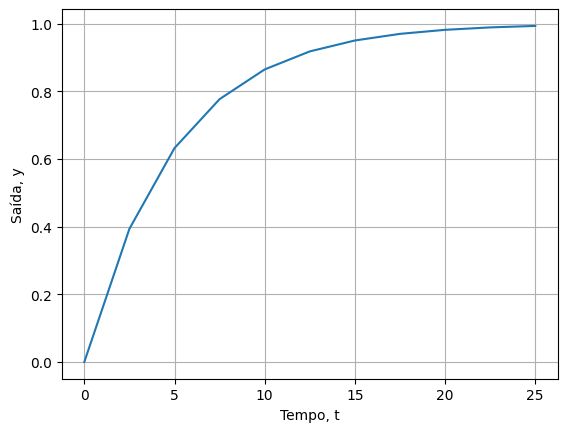

In [111]:
plt.plot(t, y)
plt.xlabel('Tempo, t')
plt.ylabel('Saída, y')
plt.grid()

In [112]:
dados = {'Tempo':t, 'Entrada u': u, 'Saída y': y}
df = pd.DataFrame(dados, index=sample)
df.index.name='Amostragem'
df

,Tempo,Entrada u,Saída y
Amostragem,,,
0,0.0,1.0,0.000000
1,2.5,1.0,0.393469
2,5.0,1.0,0.632121
3,7.5,1.0,0.776870
4,10.0,1.0,0.864665
5,12.5,1.0,0.917915
6,15.0,1.0,0.950213
7,17.5,1.0,0.969803
8,20.0,1.0,0.981684


In [113]:
from IPython.display import HTML

HTML(df.to_html(index=False))

Tempo,Entrada u,Saída y
0.0,1.0,0.000000
2.5,1.0,0.393469
5.0,1.0,0.632121
7.5,1.0,0.776870
10.0,1.0,0.864665
12.5,1.0,0.917915
15.0,1.0,0.950213
17.5,1.0,0.969803
20.0,1.0,0.981684
22.5,1.0,0.988891


# Sistema de primeira ordem com tempo-morto:

$$G(s)=\frac{e^{-5s}}{5s+1} $$

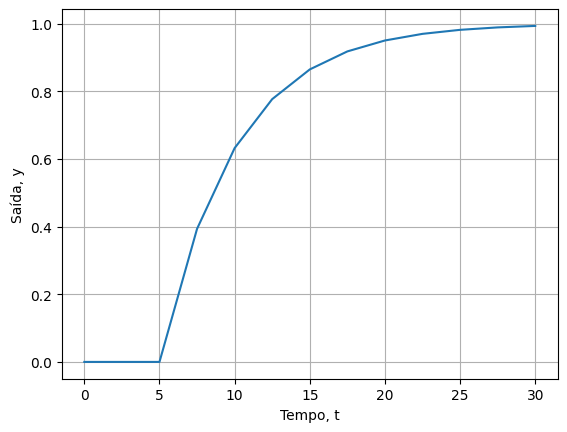

In [114]:
# Especificação do sistema
theta = 5
G2 = G1*ct.tf(*ct.pade(theta,15,15)) # Aproximação de Padé (alta ordem)

# Resposta ao degrau
tsimu = np.arange(start=0, stop=25+Ts+theta, step=Ts)
N = len(tsimu)
sample = range(N) # Número da amostragem
u = np.ones(N) # Variável de entrada
t, y2 = ct.step_response(G2, T=tsimu)
y2[t<=theta] = 0.0

# Saída gráfica
plt.plot(t, y2)
plt.xlabel('Tempo, t')
plt.ylabel('Saída, y')
plt.grid()

In [115]:
dados = {'Tempo':t, 'Entrada u': u, 'Saída y': y2}
df = pd.DataFrame(dados, index=sample)
df.index.name='Amostragem'
df

,Tempo,Entrada u,Saída y
Amostragem,,,
0,0.0,1.0,0.000000
1,2.5,1.0,0.000000
2,5.0,1.0,0.000000
3,7.5,1.0,0.393428
4,10.0,1.0,0.632119
5,12.5,1.0,0.776870
6,15.0,1.0,0.864665
7,17.5,1.0,0.917915
8,20.0,1.0,0.950213
